# Mark Subclip Intervals

This notebook is used to (manually) identify and document a 15-second interval in relevant videos where a humpback whale encounter is evident. 

We repeat a similar process for irrelevant videos, replacing manual interval annotation with a randomly generated 15-second interval. 

The 15-second intervals annotated here will serve as input for training our model. 

In [20]:
import pandas as pd
import numpy as np

In [69]:
#load df of successful video downloads
workspace_path = '/mount/data'
downloads_df = pd.read_csv(workspace_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,0:10,0:25
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,0:44,0:59
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,0:05,0:20
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,2:40,2:55
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,0:00,0:15


# Add a Column to Store Clip Interval 
(only run this once)

In [33]:
# downloads_df['clip_start'] = [''for i in range(0, len(downloads_df))]
# downloads_df['clip_end'] = ['' for i in range(0, len(downloads_df))]

# downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,,
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,,
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,,
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,,
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,,


# Relevant Subclip Annotation

In [22]:
#functions to double check relevance of each new potential video
from IPython.display import YouTubeVideo, Image, display, Video, HTML

def display_video(index, video_title, url):
    # display video - need to pass in videoID (at end of url) 
    print("{}: {}".format(index, video_title))
    print(url)
    videoID = url.split('/')[3]
    display(YouTubeVideo(videoID))

def get_occurence_intervals():
    '''allows user to enter occurence interval start + end time'''

    start = input('Clip Start Time: ')
    end = input('Clip End Time:   ')

    return start, end

How many videos do you want to annotate?: 

 44


53: video_0066.mp4
https://youtu.be/Et8K0OvH5Ag


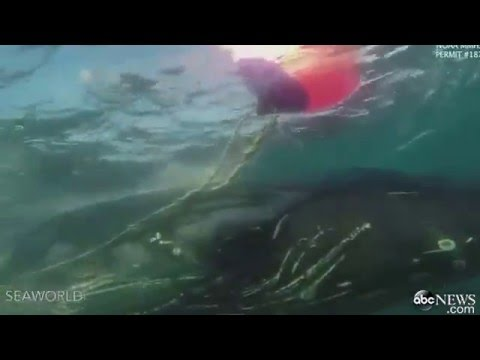

Clip Start Time:  0:05
Clip End Time:    0:20


54: video_0067.mp4
https://youtu.be/FztOHiGiFWI


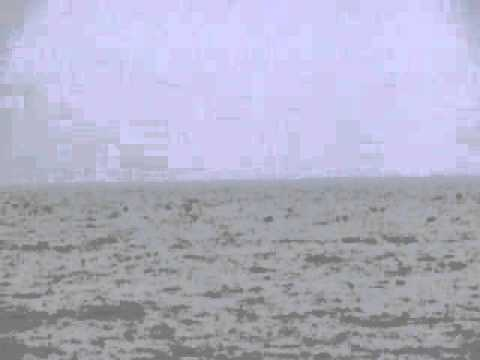

Clip Start Time:  0:03
Clip End Time:    0:18


55: video_0068.mp4
https://youtu.be/HdNpqor2Tso


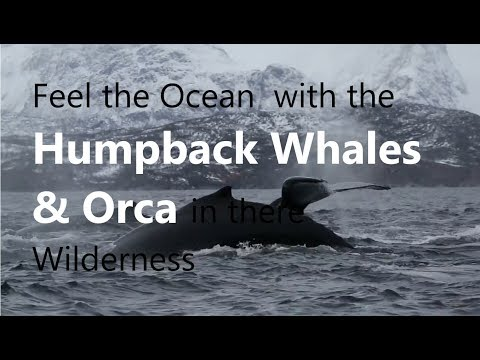

Clip Start Time:  1:05
Clip End Time:    1:20


56: video_0070.mp4
https://youtu.be/oLioQPJVhr8


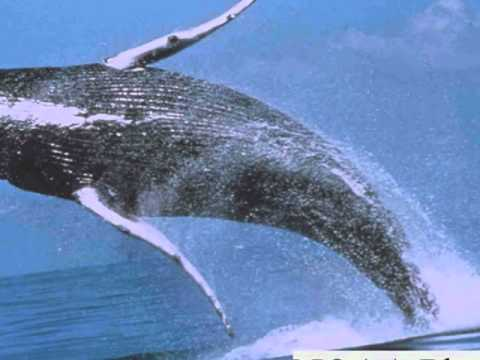

Clip Start Time:  0:15
Clip End Time:    0:30


57: video_0071.mp4
https://youtu.be/D1NxXVAMAV4


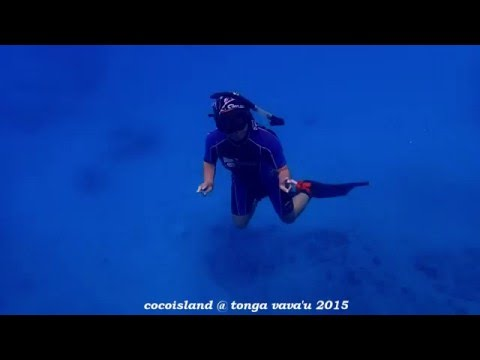

Clip Start Time:  0:29
Clip End Time:    0:44


58: video_0072.mp4
https://youtu.be/B6j09ZpIczM


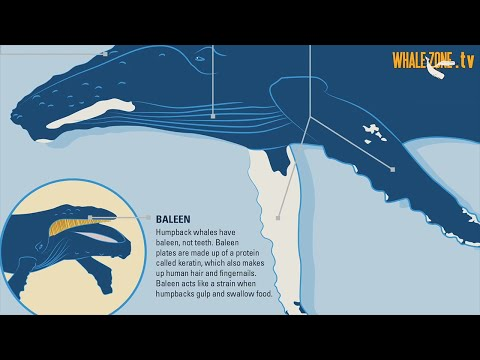

Clip Start Time:  0:40
Clip End Time:    0:55


59: video_0075.mp4
https://youtu.be/HTsKcwJcrwo


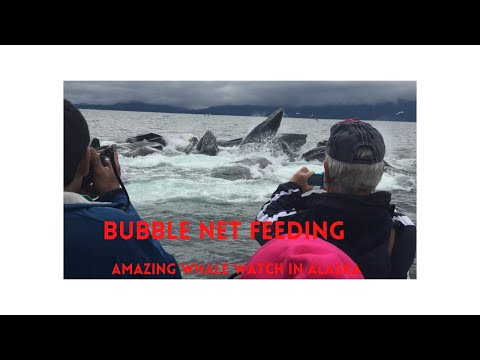

Clip Start Time:  0:13
Clip End Time:    0:28


60: video_0078.mp4
https://youtu.be/WQt8ajXamRE


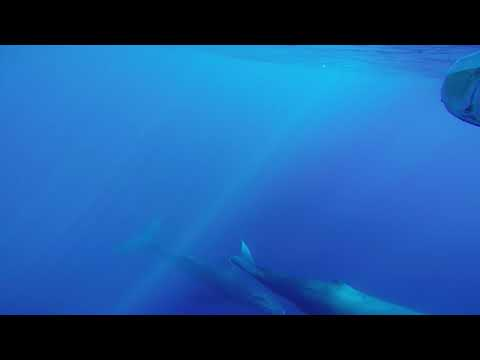

Clip Start Time:  0:00
Clip End Time:    0:15


61: video_0079.mp4
https://youtu.be/sxQnFwgn1kU


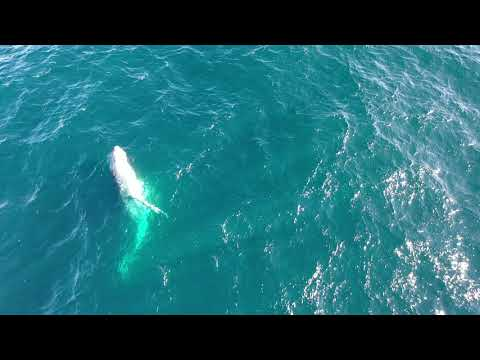

Clip Start Time:  0:05
Clip End Time:    0:20


62: video_0080.mp4
https://youtu.be/M7rMGYqtSiA


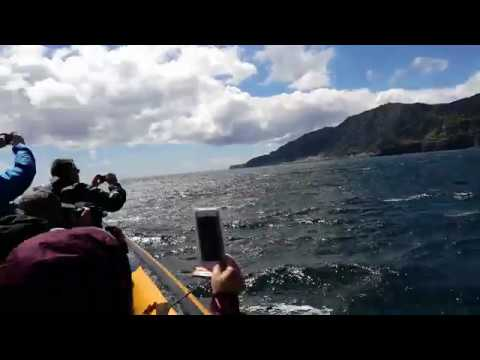

Clip Start Time:  0:15
Clip End Time:    0:30


63: video_0083.mp4
https://youtu.be/3KRyiR2_yVQ


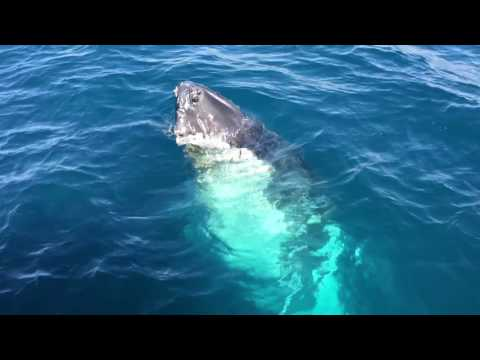

Clip Start Time:  1:02
Clip End Time:    1:17


64: video_0084.mp4
https://youtu.be/Q_rLSTxG8_4


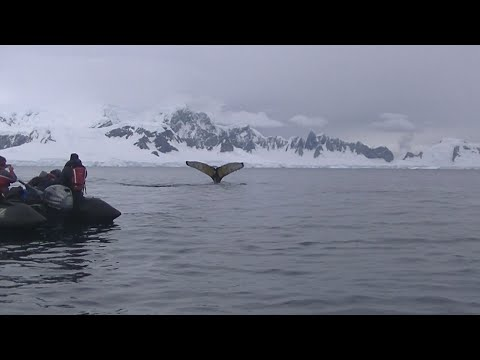

Clip Start Time:  6:30
Clip End Time:    6:45


65: video_0085.mp4
https://youtu.be/xDodXg4sK-w


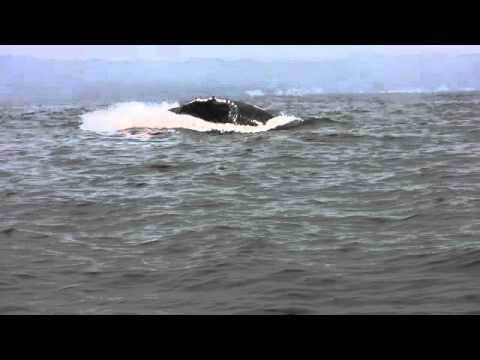

Clip Start Time:  1:00
Clip End Time:    1:15


66: video_0088.mp4
https://youtu.be/Qz_RM0VKTvk


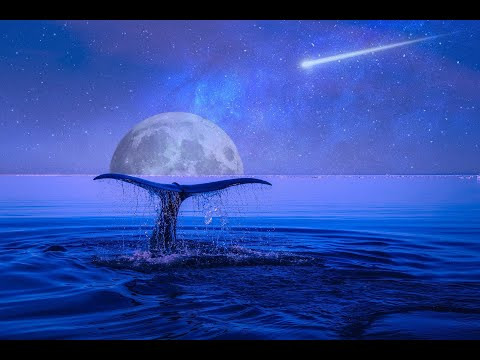

Clip Start Time:  2:45
Clip End Time:    3:00


67: video_0089.mp4
https://youtu.be/s5yq2SZcjHg


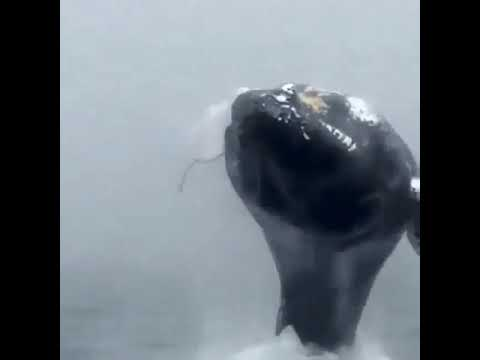

Clip Start Time:  0:00
Clip End Time:    0:14


68: video_0090.mp4
https://youtu.be/nDqDnKiIC-U


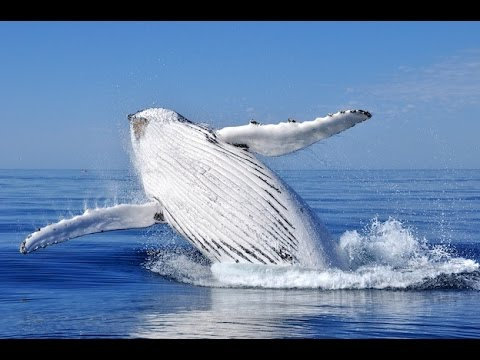

Clip Start Time:  5:06
Clip End Time:    5:21


69: video_0091.mp4
https://youtu.be/DQvP01mQWjE


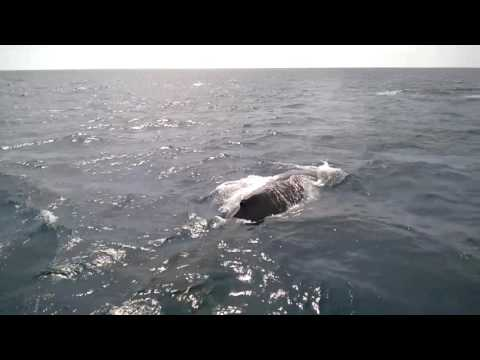

Clip Start Time:  1:25
Clip End Time:    1:40


70: video_0092.mp4
https://youtu.be/3bwN4JPCfI0


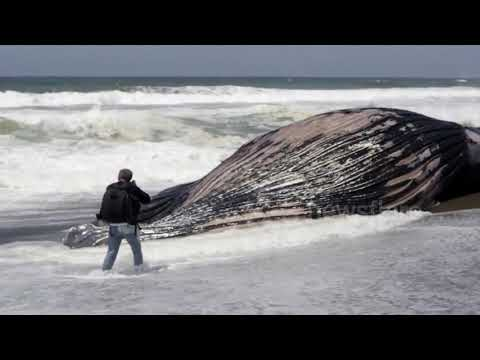

Clip Start Time:  0:00
Clip End Time:    0:15


71: video_0094.mp4
https://youtu.be/LCNvpa0oqSA


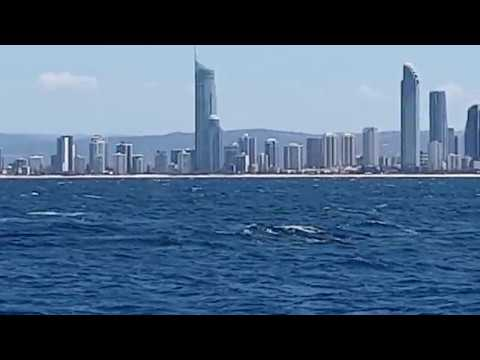

Clip Start Time:  0:40
Clip End Time:    0:55


73: video_0096.mp4
https://youtu.be/RVUwblI7Rj0


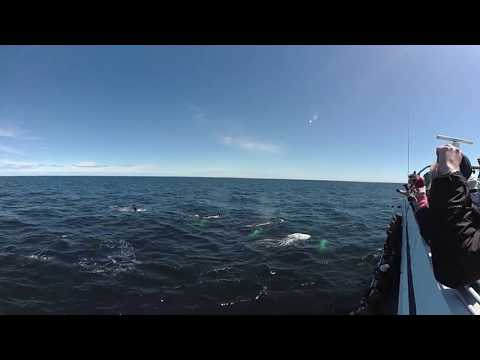

Clip Start Time:  1:20
Clip End Time:    1:35


75: video_0099.mp4
https://youtu.be/Pu2zz91MQDE


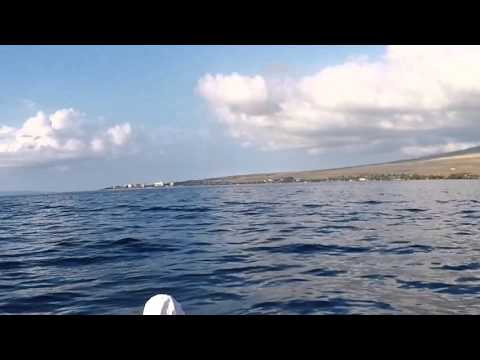

Clip Start Time:  0:10
Clip End Time:    0:25


76: video_0100.mp4
https://youtu.be/yVkjEWBdQWc


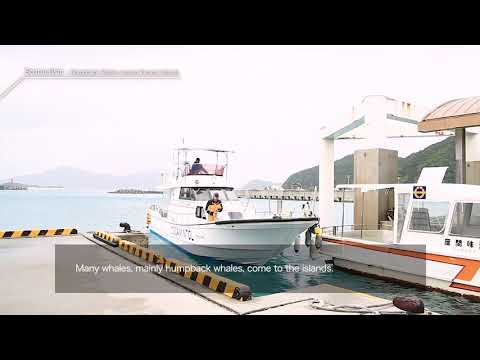

Clip Start Time:  0:45
Clip End Time:    1:00


77: video_0103.mp4
https://youtu.be/XX5fgMcm6-8


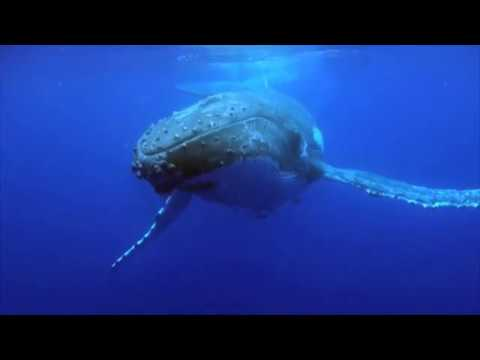

Clip Start Time:  0:20
Clip End Time:    0:35


79: video_0106.mp4
https://youtu.be/NnaPPOuvMtM


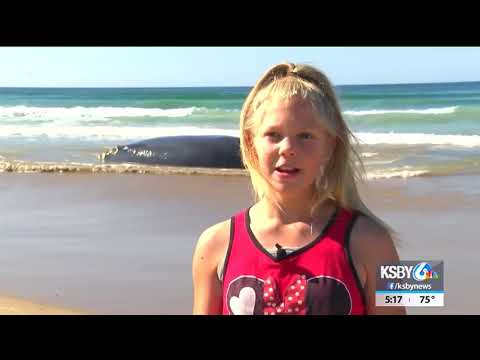

Clip Start Time:  1:40
Clip End Time:    1:55


80: video_0107.mp4
https://youtu.be/fRVxS4a5t6E


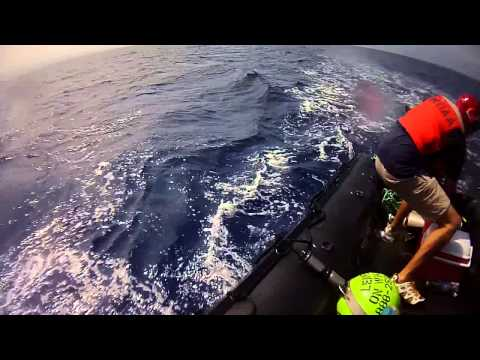

Clip Start Time:  0:00
Clip End Time:    0:15


81: video_0108.mp4
https://youtu.be/fk9dswhB8A8


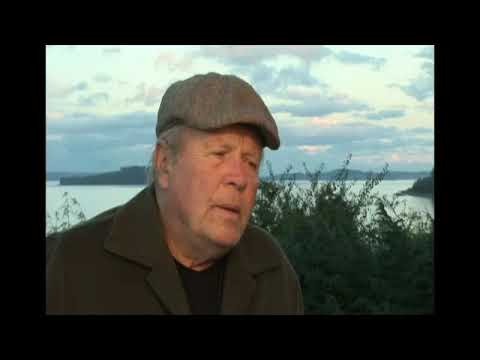

Clip Start Time:  0:25
Clip End Time:    0:40


82: video_0110.mp4
https://youtu.be/TxwiLcF3_9w


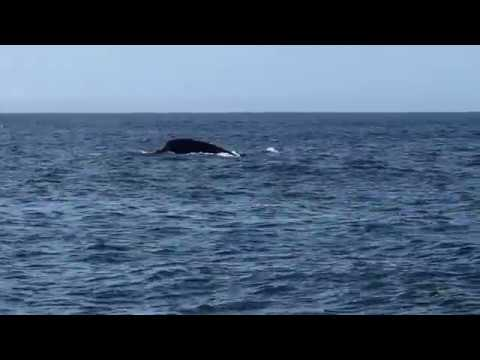

Clip Start Time:  0:35
Clip End Time:    0:40


83: video_0111.mp4
https://youtu.be/u_0fEwRraUY


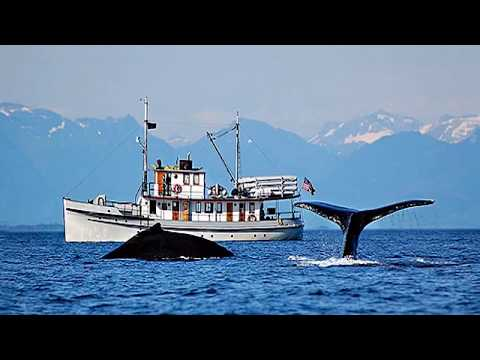

Clip Start Time:  0:35
Clip End Time:    0:40


86: video_0116.mp4
https://youtu.be/icKqRWZZcGA


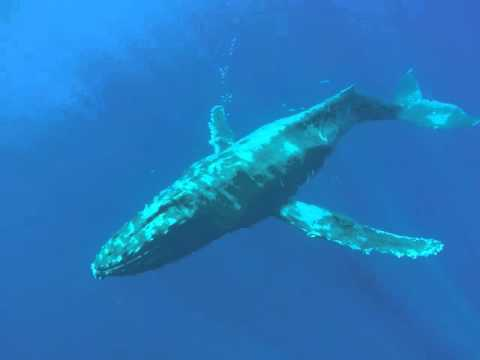

Clip Start Time:  2:00
Clip End Time:    2:15


88: video_0118.mp4
https://youtu.be/-eVUfYUuaAE


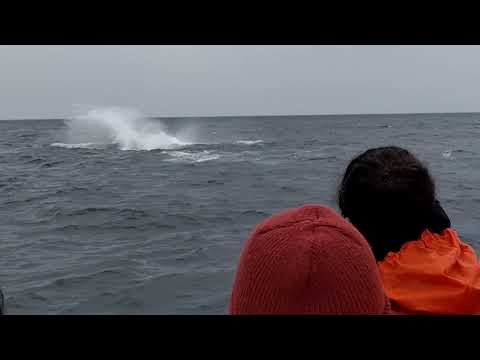

Clip Start Time:  3:12
Clip End Time:    3:27


89: video_0119.mp4
https://youtu.be/ugt-7VPhQ_E


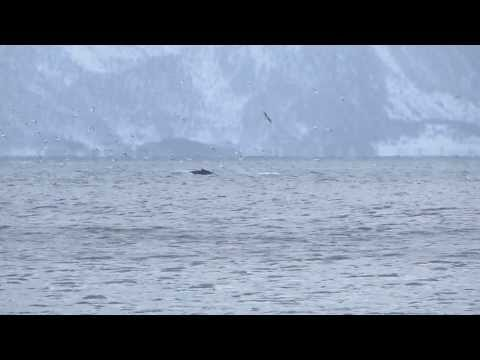

Clip Start Time:  0:50
Clip End Time:    1:05


90: video_0121.mp4
https://youtu.be/XQYMQJ2qmF4


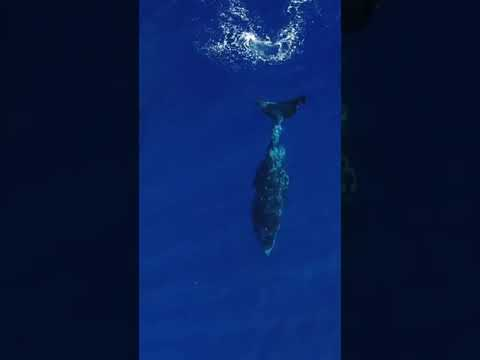

Clip Start Time:  0:05
Clip End Time:    0:20


91: video_0122.mp4
https://youtu.be/2GW084UvZUM


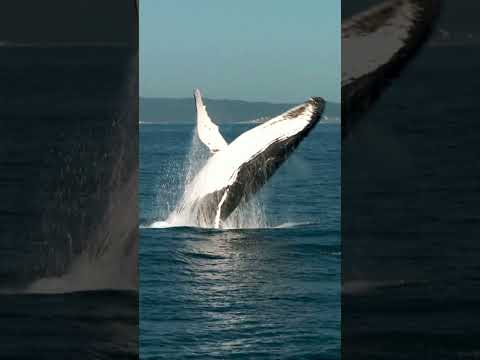

Clip Start Time:  0:00
Clip End Time:    0:13


92: video_0123.mp4
https://youtu.be/DxLGc_kamm4


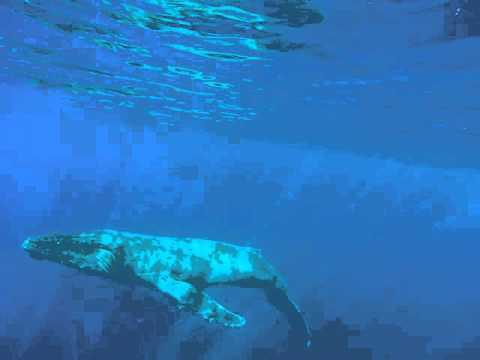

Clip Start Time:  2:22
Clip End Time:    2:37


93: video_0126.mp4
https://youtu.be/Hpnpj8wWsI0


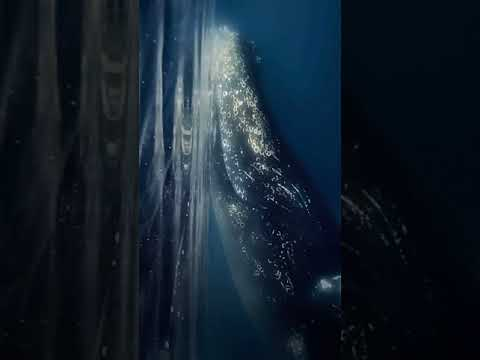

Clip Start Time:  0:00
Clip End Time:    0:15


96: video_0129.mp4
https://youtu.be/zAaw8yoZZjs


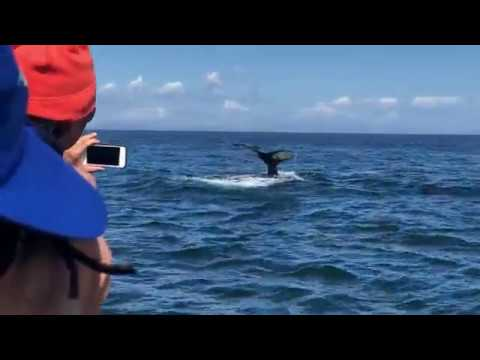

Clip Start Time:  4:55
Clip End Time:    5:10


97: video_0131.mp4
https://youtu.be/sEbKnXa-Tdg


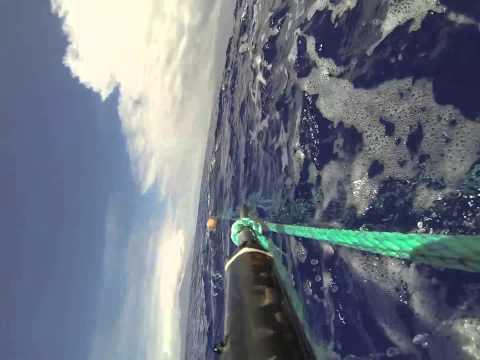

Clip Start Time:  0:05
Clip End Time:    0:20


98: video_0132.mp4
https://youtu.be/WMVezwtlbOc


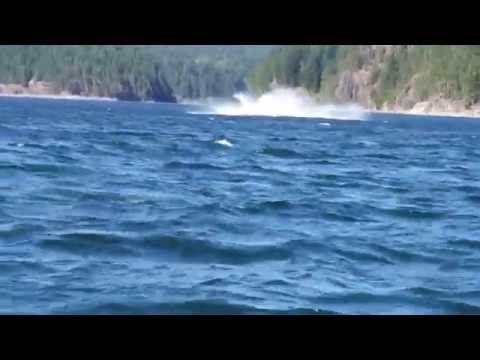

Clip Start Time:  0:00
Clip End Time:    0:04


101: video_0135.mp4
https://youtu.be/gQUrquj3wDE


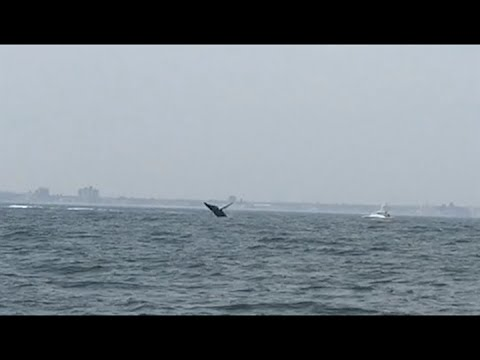

Clip Start Time:  0:10
Clip End Time:    0:25


102: video_0136.mp4
https://youtu.be/sXzFjTuyYmI


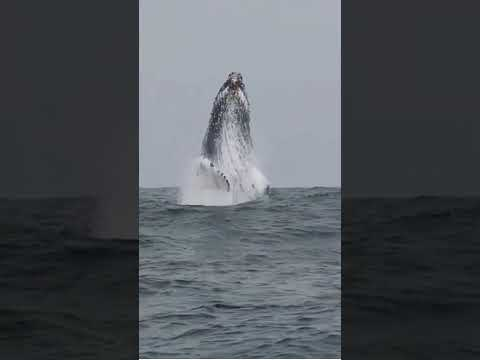

Clip Start Time:  0:15
Clip End Time:    0:26


103: video_0137.mp4
https://youtu.be/G_pmA60mbIE


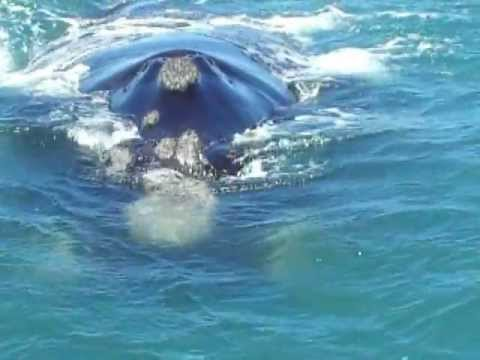

Clip Start Time:  0:00
Clip End Time:    0:15


104: video_0138.mp4
https://youtu.be/GVlN9siQr-Q


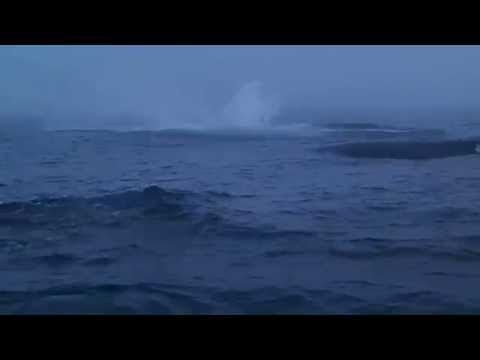

Clip Start Time:  0:40
Clip End Time:    0:55


105: video_0139.mp4
https://youtu.be/Zg6jLSaEtCQ


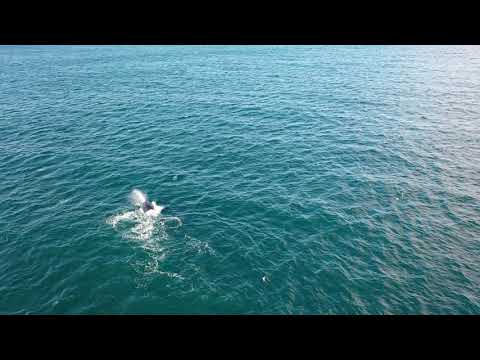

Clip Start Time:  0:40
Clip End Time:    0:55


106: video_0140.mp4
https://youtu.be/pD9fLSa5oH0


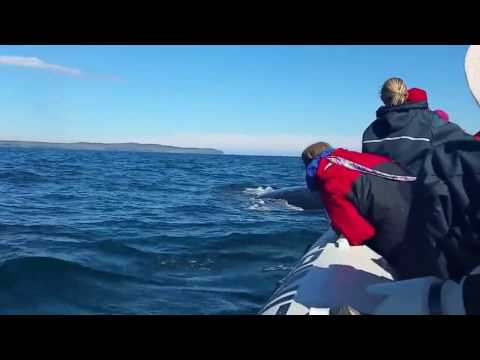

Clip Start Time:  0:45
Clip End Time:    1:00


Done annotating videos 53 to 106 



In [127]:
#loop through relevant videos and annotate whale encounter intervals
print('How many videos do you want to annotate?:', end = " ")
num_videos = int(input())

#pickup on the next relevant video w/o a clip interval
video_indices_to_annotate = list(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)].index)

#annotate clip intervals and record in dataset
for i in video_indices_to_annotate[:num_videos]:
    row = downloads_df.loc[i]
    display_video(i, row['renamed_title'], row['url'])
    clip_start, clip_end = get_occurence_intervals()
    downloads_df.at[i, ('clip_start')] = clip_start
    downloads_df.at[i, ('clip_end')] = clip_end   
    
print(f'Done annotating videos {video_indices_to_annotate[0]} to {video_indices_to_annotate[num_videos-1]} \n')

In [128]:
#checking updates
downloads_df[(downloads_df.clip_start.notna()) & (downloads_df.relevant == True)][-4:]

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
103,G_pmA60mbIE,https://youtu.be/G_pmA60mbIE,HUMPBACK WHALES @ HERMANUS - SOUTH AFRICA (HD),creativeCommon,True,video_0137.mp4,0:00,0:15
104,GVlN9siQr-Q,https://youtu.be/GVlN9siQr-Q,Humpback Whales - Brier Island,creativeCommon,True,video_0138.mp4,0:40,0:55
105,Zg6jLSaEtCQ,https://youtu.be/Zg6jLSaEtCQ,Humpback Whale by Drone Clovelly and Coogee be...,creativeCommon,True,video_0139.mp4,0:40,0:55
106,pD9fLSa5oH0,https://youtu.be/pD9fLSa5oH0,Newfoundland Humpback Whales,creativeCommon,True,video_0140.mp4,0:45,1:00


In [129]:
print(len(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)]), 'more relevant videos to annotate')

100 more relevant videos to annotate


# Save Changes

In [130]:
# update csv with annotated intervals
downloads_df.to_csv(workspace_path + '/downloaded_videos.csv', index=False)
downloads_df.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloaded_videos.csv', index=False)